<a href="https://colab.research.google.com/github/meriemdouider1/Elimination-recursive-des-fonctionnalit-s/blob/main/Recursive_Feature_Elimination_(RFE)_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [ ]:
Cl = '/content/cs-longia.xlsx' 
data= pd.read_excel(Cl, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [ ]:
del data["Source"] 
del data["CodeSite"] 
data

,X_long,Y_lat,Cs_longia,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,1,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,1,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,1,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-5.366667,35.766667,1,8.495770,105.550156,8.691405,15.116930,0.698221,0,0,0,0,18,30,13,0,39,0,0,1390,510,70,20,78,2,0,80,880,1950,647,153,241,0,14903,543,78,5,92,2,0,...,25.700001,22.100000,18.700001,16.500000,9.4,9.6,11.5,13.1,15.400000,18.500000,21.200001,21.700001,19.700001,16.100000,12.800000,10.5,1.09,1.14,1.20,1.27,1.47,1.74,1.96,2.07,1.93,1.65,1.35,1.19,4.1,4.6,4.6,4.3,4.1,3.9,3.9,4.1,4.0,4.0,4.0,4.2
250,-5.816667,35.783333,1,0.000000,0.000000,0.000000,0.000000,1.725019,0,0,0,0,0,0,0,0,0,0,100,2050,640,0,10,92,0,0,92,1400,2690,593,254,146,0,14838,478,42,1,94,1,0,...,25.700001,22.400000,19.000000,16.100000,9.6,10.7,12.4,13.9,16.000000,19.400000,21.200001,21.700001,20.100000,16.799999,13.400000,10.5,1.10,1.15,1.21,1.28,1.48,1.73,1.97,2.05,1.92,1.64,1.37,1.21,3.7,4.3,4.6,4.1,3.8,3.7,3.7,3.7,3.3,3.6,3.8,4.0
251,-5.366667,35

In [ ]:
X = data.loc[:, data.columns != 'Cs_longia']
Y = data.Cs_longia

In [ ]:
X

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,53,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,85,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,77,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-5.366667,35.766667,8.495770,105.550156,8.691405,15.116930,0.698221,0,0,0,0,18,30,13,0,39,0,0,1390,510,70,20,78,2,0,80,880,1950,647,153,241,0,14903,543,78,5,92,2,0,94,...,25.700001,22.100000,18.700001,16.500000,9.4,9.6,11.5,13.1,15.400000,18.500000,21.200001,21.700001,19.700001,16.100000,12.800000,10.5,1.09,1.14,1.20,1.27,1.47,1.74,1.96,2.07,1.93,1.65,1.35,1.19,4.1,4.6,4.6,4.3,4.1,3.9,3.9,4.1,4.0,4.0,4.0,4.2
250,-5.816667,35.783333,0.000000,0.000000,0.000000,0.000000,1.725019,0,0,0,0,0,0,0,0,0,0,100,2050,640,0,10,92,0,0,92,1400,2690,593,254,146,0,14838,478,42,1,94,1,0,95,...,25.700001,22.400000,19.000000,16.100000,9.6,10.7,12.4,13.9,16.000000,19.400000,21.200001,21.700001,20.100000,16.799999,13.400000,10.5,1.10,1.15,1.21,1.28,1.48,1.73,1.97,2.05,1.92,1.64,1.37,1.21,3.7,4.3,4.6,4.1,3.8,3.7,3.7,3.7,3.3,3.6,3.8,4.0
251,-

In [ ]:
Y

0      1
1      1
2      1
3      0
4      0
      ..
249    1
250    1
251    1
252    1
253    1
Name: Cs_longia, Length: 254, dtype: int64

In [ ]:
def tp(y_true, y_pred):
  specificite= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
  return specificite
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred):
  MCC= matthews_corrcoef(y_true, y_pred) 
  return MCC
my_scorer1 = make_scorer(tp1, greater_is_better=True)


In [ ]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
import xgboost as xgb
# create pipeline
rfe = RFE(estimator=XGBClassifier(scale_pos_weight=1.5,
learning_rate=0.1,max_depth=5,n_estimators=100), n_features_to_select=15)
model = XGBClassifier(scale_pos_weight=1.5,
learning_rate=0.1,max_depth=5,n_estimators=100)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(pipeline, X, Y, scoring='accuracy', cv=cv, n_jobs=-1,error_score='raise')
scores1 = cross_val_score(pipeline, X, Y, scoring='precision', cv=cv, n_jobs=-1)
scores2 = cross_val_score(pipeline, X, Y, scoring='recall', cv=cv, n_jobs=-1)
scores3 = cross_val_score(pipeline, X, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
scores4 = cross_val_score(pipeline, X, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
# report performance
print('Accuracy:',scores)
print('moy_accuracy: %.2f' % mean(scores))
print('precision:',scores1)
print('moy_precision: %.2f' % mean(scores1))
print('sensibilité :',scores2)
print('moy_sensibilité: %.2f' % mean(scores2))
print('spécificité :',scores3)
print('moy_spécificité: %.2f' % mean(scores3))
print('MCC :',scores4)
print('MCC: %.2f' % mean(scores4))

Accuracy: [0.64705882 0.56862745 0.62745098 0.66666667 0.62      ]
moy_accuracy: 0.63
precision: [0.76       0.5        0.67741935 0.57142857 0.5862069 ]
moy_precision: 0.62
sensibilité : [0.61290323 0.77272727 0.7        0.6        0.70833333]
moy_sensibilité: 0.68
spécificité : [0.7        0.4137931  0.52380952 0.70967742 0.53846154]
moy_spécificité: 0.58
MCC : [0.30559708 0.19596238 0.22560722 0.30720983 0.24981573]
MCC: 0.26


In [ ]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import xgboost as xgb
# create pipeline
rfe = RFE(estimator=XGBClassifier(scale_pos_weight=1.5,
learning_rate=0.1,max_depth=5,n_estimators=100), n_features_to_select=10)
model = XGBClassifier(scale_pos_weight=1.5,
learning_rate=0.1,max_depth=5,n_estimators=100)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores4 = cross_val_score(pipeline, X, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
# report performance
print('MCC :',scores4)
print('MCC: %.2f' % mean(scores4))

MCC : [0.24054969 0.32650492 0.23659777 0.49777669 0.36217949]
MCC: 0.33


In [ ]:
# create pipeline
rfe = RFECV(estimator=XGBClassifier(scale_pos_weight=1.5,
learning_rate=0.1,max_depth=5,n_estimators=100))
model = XGBClassifier(scale_pos_weight=1.5,
learning_rate=0.1,max_depth=5,n_estimators=100)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores4 = cross_val_score(pipeline, X, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
# report performance
print('MCC :',scores4)
print('MCC: %.2f' % mean(scores4))

MCC : [ 0.24717366  0.22904222  0.26253205 -0.04560478  0.1638559 ]
MCC: 0.17


In [ ]:
# report which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE   
from sklearn.tree import DecisionTreeClassifier
rfe = RFE(estimator=XGBClassifier(scale_pos_weight=1.5,
learning_rate=0.1,max_depth=5,n_estimators=100), n_features_to_select=10)
# fit RFE
rfe.fit(X, Y)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))


Column: 0, Selected False, Rank: 78.000
Column: 1, Selected False, Rank: 46.000
Column: 2, Selected False, Rank: 115.000
Column: 3, Selected False, Rank: 176.000
Column: 4, Selected False, Rank: 174.000
Column: 5, Selected False, Rank: 12.000
Column: 6, Selected False, Rank: 67.000
Column: 7, Selected False, Rank: 169.000
Column: 8, Selected False, Rank: 177.000
Column: 9, Selected False, Rank: 182.000
Column: 10, Selected False, Rank: 185.000
Column: 11, Selected False, Rank: 188.000
Column: 12, Selected False, Rank: 189.000
Column: 13, Selected False, Rank: 159.000
Column: 14, Selected False, Rank: 44.000
Column: 15, Selected False, Rank: 123.000
Column: 16, Selected False, Rank: 193.000
Column: 17, Selected False, Rank: 195.000
Column: 18, Selected False, Rank: 42.000
Column: 19, Selected False, Rank: 136.000
Column: 20, Selected False, Rank: 58.000
Column: 21, Selected False, Rank: 133.000
Column: 22, Selected False, Rank: 100.000
Column: 23, Selected False, Rank: 108.000
Column: 2

>xgboost 0.317 (0.037)
>Logistic 0.280 (0.137)
>RandomForest 0.347 (0.045)
>GradientBoosting 0.192 (0.075)


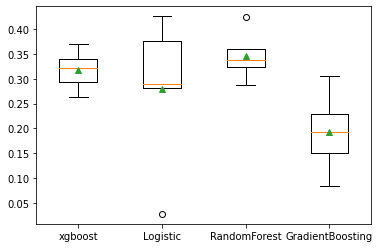

In [ ]:
# get a list of models to evaluate
def get_models():
	models = dict()
	# xgboost
	rfe = RFE(estimator=XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100), n_features_to_select=5)
	model = XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100)
	models['xgboost'] = Pipeline(steps=[('s',rfe),('m',model)])
	# Logistic
	rfe = RFE(estimator=LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11), n_features_to_select=5)
	model = LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11)
	models['Logistic'] = Pipeline(steps=[('s',rfe),('m',model)])
	# RandomForest
	rfe = RFE(estimator=RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11), n_features_to_select=5)
	model = RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11)
	models['RandomForest'] = Pipeline(steps=[('s',rfe),('m',model)])
	# GradientBoosting
	rfe = RFE(estimator=GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ), n_features_to_select=5)
	model = GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 )
	models['GradientBoosting'] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = KFold(n_splits=5, random_state=1, shuffle=True)
	scores = cross_val_score(model, X, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
	return scores
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, Y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>xgboost 0.333 (0.096)
>Logistic 0.244 (0.094)
>RandomForest 0.320 (0.140)
>GradientBoosting 0.225 (0.120)


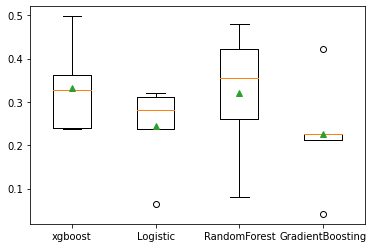

In [ ]:
# get a list of models to evaluate
def get_models():
	models = dict()
	# xgboost
	rfe = RFE(estimator=XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100), n_features_to_select=10)
	model = XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100)
	models['xgboost'] = Pipeline(steps=[('s',rfe),('m',model)])
	# Logistic
	rfe = RFE(estimator=LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11), n_features_to_select=10)
	model = LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11)
	models['Logistic'] = Pipeline(steps=[('s',rfe),('m',model)])
	# RandomForest
	rfe = RFE(estimator=RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11), n_features_to_select=10)
	model = RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11)
	models['RandomForest'] = Pipeline(steps=[('s',rfe),('m',model)])
	# GradientBoosting
	rfe = RFE(estimator=GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ), n_features_to_select=10)
	model = GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 )
	models['GradientBoosting'] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = KFold(n_splits=5, random_state=1, shuffle=True)
	scores = cross_val_score(model, X, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
	return scores
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, Y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>xgboost 0.257 (0.044)
>Logistic 0.264 (0.039)
>RandomForest 0.294 (0.067)
>GradientBoosting 0.300 (0.056)


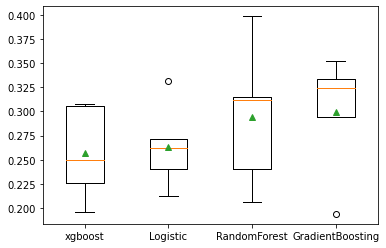

In [ ]:
# get a list of models to evaluate
def get_models():
	models = dict()
	# xgboost
	rfe = RFE(estimator=XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100), n_features_to_select=15)
	model = XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100)
	models['xgboost'] = Pipeline(steps=[('s',rfe),('m',model)])
	# Logistic
	rfe = RFE(estimator=LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11), n_features_to_select=15)
	model = LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11)
	models['Logistic'] = Pipeline(steps=[('s',rfe),('m',model)])
	# RandomForest
	rfe = RFE(estimator=RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11), n_features_to_select=15)
	model = RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11)
	models['RandomForest'] = Pipeline(steps=[('s',rfe),('m',model)])
	# GradientBoosting
	rfe = RFE(estimator=GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ), n_features_to_select=15)
	model = GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 )
	models['GradientBoosting'] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = KFold(n_splits=5, random_state=1, shuffle=True)
	scores = cross_val_score(model, X, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
	return scores
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, Y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>xgboost 0.336 (0.087)
>Logistic 0.222 (0.125)
>RandomForest 0.319 (0.111)
>GradientBoosting 0.282 (0.086)


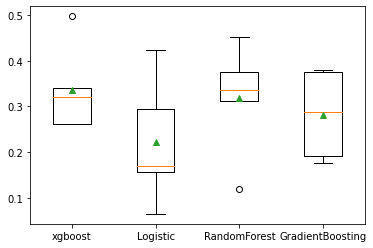

In [ ]:
# get a list of models to evaluate
def get_models():
	models = dict()
	# xgboost
	rfe = RFE(estimator=XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100), n_features_to_select=20)
	model = XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100)
	models['xgboost'] = Pipeline(steps=[('s',rfe),('m',model)])
	# Logistic
	rfe = RFE(estimator=LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11), n_features_to_select=20)
	model = LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11)
	models['Logistic'] = Pipeline(steps=[('s',rfe),('m',model)])
	# RandomForest
	rfe = RFE(estimator=RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11), n_features_to_select=20)
	model = RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11)
	models['RandomForest'] = Pipeline(steps=[('s',rfe),('m',model)])
	# GradientBoosting
	rfe = RFE(estimator=GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ), n_features_to_select=20)
	model = GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 )
	models['GradientBoosting'] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = KFold(n_splits=5, random_state=1, shuffle=True)
	scores = cross_val_score(model, X, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
	return scores
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, Y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()